# 1. 케라스 DNN
  - 출처 : https://www.kaggle.com/dakshmiglani/credit-card-fraudulent-detection-with-dnn-keras/notebook
  - Credit Card Fraudulent Detection

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras

### 데이터 로드

In [3]:
df = pd.read_csv('C:/Users/kimsu/SlowML/creditcard.csv')
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [4]:
df['Class'].unique() # 0 = no fraud, 1 = fraudulent

array([0, 1], dtype=int64)

  - 데이터와 라벨 분리
  - 트레이닝 셋과 테스트셋 분리

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=1)

  - 데이터 정규화

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

### 네트워크 설계

In [9]:
clf = Sequential([
    Dense(units=16, kernel_initializer='uniform', input_dim=30, activation='relu'),
    Dense(units=18, kernel_initializer='uniform', activation='relu'),
    Dropout(0.25),
    Dense(20, kernel_initializer='uniform', activation='relu'),
    Dense(24, kernel_initializer='uniform', activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

In [10]:
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                306       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


### DNN 학습

In [11]:
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
clf.fit(X_train, Y_train, batch_size=15, epochs=2)

Epoch 1/2
256326/256326 [==============================] - 65s - loss: 0.0076 - acc: 0.9989    
Epoch 2/2
256326/256326 [==============================] - 69s - loss: 0.0035 - acc: 0.9993    


In [15]:
score = clf.evaluate(X_test, Y_test, verbose=0)
print(clf.metrics_names)
print(score)

['loss', 'acc']
[0.0053123236212284175, 0.99919244408553065]


# 2. 케라스 CNN 
### 라이브러리 임포트

In [14]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, pooling
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

### 데이터 준비
  - 데이터 차원
    - Backend로 Theano를 사용할 경우엔 (channel, width, height)
    - Tensorflow를 사용할 경우엔 (width, height, channel)

In [22]:
(X_train, y_train),(X_test, y_test) = mnist.load_data() #다운로드
len(X_train) 

60000

In [94]:
# 인풋을 (데이터개수,28 ,28,1)이 되도록 리쉐이프
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# 데이터 타입 변환 및 노멀라이즈
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [97]:
# 클래스(라벨)을 범주형 데이터로 변환
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [100]:
Y_train = np_utils.to_categorical(y_train, n_class)
Y_test = np_utils.to_categorical(y_test, n_class)
print(Y_train[:10])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### CNN 네트워크 생성

In [107]:
model = Sequential() #CNN 이나 RNN은 시퀀셜

#컨볼루션 레이어
model.add(Convolution2D(32, 3, 3, activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
#풀리커넥티트 레이어
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

c:\users\kimsu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
c:\users\kimsu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """


### 학습알고리즘 정의 및 학습

In [109]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)

c:\users\kimsu\appdata\local\programs\python\python36\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
60000/60000 [==============================] - 366s - loss: 0.1198 - acc: 0.9644   


### 테스트

In [110]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.050469637843745294, 0.98340000000000005]


# 3. 케라스 RNN
  - 시계열을 입력으로 다음 스텝의 출력을 예측하는 단순한 시계열 예측 문제
  
## 데이터
  - 사인파형 시계열 데이터

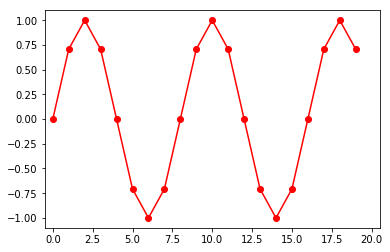

In [24]:
import matplotlib.pyplot as plt

s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

  - Keras 에서 RNN의 입력 데이터는 (nb_samples, timesteps, input_dim) 3차원 텐서(tensor) 형태임
    - nb_samples: 자료의 수
    - timesteps: 순서열의 길이
    - input_dim: x 벡터의 크기
  - 단일 시계열이므로 input_dim=1 이고 3 스텝 크기의 순서열을 사용하므로 timesteps=3 이며 자료의 수는 18개

In [28]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[  0.00000000e+00,   7.07106781e-01,   1.00000000e+00],
       [  7.07106781e-01,   1.00000000e+00,   7.07106781e-01],
       [  1.00000000e+00,   7.07106781e-01,   1.22464680e-16],
       [  7.07106781e-01,   1.22464680e-16,  -7.07106781e-01],
       [  1.22464680e-16,  -7.07106781e-01,  -1.00000000e+00]])

In [29]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [46]:
X_train[:2]

array([[[ 0.        ],
        [ 0.70710678],
        [ 1.        ]],

       [[ 0.70710678],
        [ 1.        ],
        [ 0.70710678]]])

In [47]:
Y_train[:2]

array([  7.07106781e-01,   1.22464680e-16])

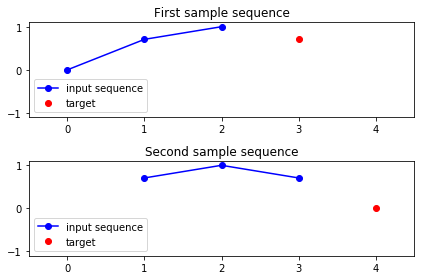

In [36]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

## 케라스 rnn 만드는 순서
  - Sequential 클래스 객체인 모형을 생성한다.
  - add 메서드로 다양한 레이어를 추가한다.
  - compile 메서드로 목적함수 및 최적화 방법을 지정한다.
  - fit 메서드로 가중치를 계산한다.

In [37]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_dim=1, input_length=3))
model.add(Dense(1))
model.compile(loss='mse', optimizer='sgd')

c:\users\kimsu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
c:\users\kimsu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(10, input_shape=(3, 1))`
  import sys


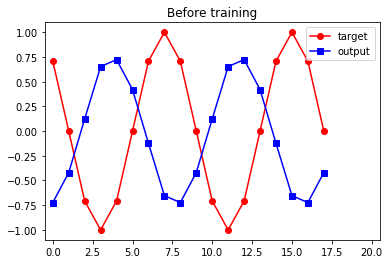

In [39]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

## 학습

In [40]:
history = model.fit(X_train, Y_train, nb_epoch=100, verbose=0)

c:\users\kimsu\appdata\local\programs\python\python36\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


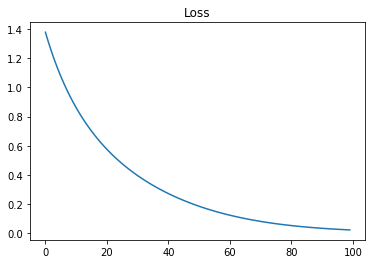

In [41]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

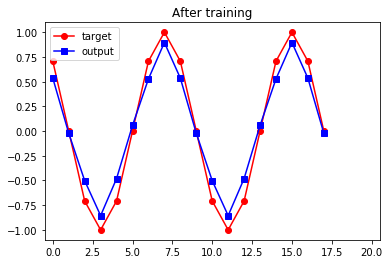

In [42]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()